Display the collected data in a visualization graph.

The graph should display the Singapore map with different markers that indicate the traffic incident and traffic bands at each location.

Initial work done in Jupyter Lab
<br>Subsequent update done in Google Colaboratory
<br>
<br>API Account Key: removed

In [1]:
# API
import requests
import json
import pprint

# Visualisation
import pandas as pd
import folium

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Extracting information

**Traffic incidents**

In [ ]:
# For traffic incidents
# URL as given in question
apiUrl = "http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents"
# headers' format follows LTA's documentation 
# AccountKey is my registered API account key
headers = {'AccountKey': 'removed',
 'accept': 'application/json'} 

# Make request
response = requests.get(url=apiUrl, headers=headers) 

# Print returned data (parse as JSON)
payload = response.json()  # Parse 'response.text' into JSON

# Using PrettyPrinter for better formatting
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

{'odata.metadata': 'http://datamall2.mytransport.sg/ltaodataservice/$metadata#IncidentSet',
 'value': [{'Latitude': 1.3438986707092928,
            'Longitude': 103.86049761585389,
            'Message': '(9/7)13:10 Heavy Traffic on CTE (towards AYE) at '
                       'PIE(Changi) Exit.',
            'Type': 'Heavy Traffic'},
           {'Latitude': 1.3062786753619768,
            'Longitude': 103.80189062415737,
            'Message': '(9/7)12:56 Roadworks on Queensway (towards Lornie) '
                       'after Commonwealth Avenue. Avoid left lane.',
            'Type': 'Roadwork'},
           {'Latitude': 1.30484938360019,
            'Longitude': 103.88347966546894,
            'Message': '(9/7)12:55 Roadworks on Mountbatten Road (towards '
                       'Changi) after Old Airport Road. Avoid left lane.',
            'Type': 'Roadwork'},
           {'Latitude': 1.3268187051427196,
            'Longitude': 103.69652006306383,
            'Message': '(9/7)12:5

In [ ]:
# Saving as a json file
# Gathered information saved as 'incidents.json'
with open('incidents.json', 'w') as json_file:
    json.dump(payload, json_file)

**Traffic speed bands**

In [ ]:
# For traffic speed bands
# URL as per given by question
apiUrl = "http://datamall2.mytransport.sg/ltaodataservice/TrafficSpeedBandsv2"
# headers' format follows LTA's documentation 
# AccountKey is my registered API account key
headers = {'AccountKey': 'removed',
 'accept': 'application/json'} 

# Make request
response = requests.get(url=apiUrl, headers=headers) 

# Print returned data (parse as JSON)
payload = response.json()  # Parse 'response.text' into JSON

# Using PrettyPrinter for better formatting
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

{'odata.metadata': 'http://datamall2.mytransport.sg/ltaodataservice/$metadata#TrafficSpeedBandsv2',
 'value': [{'LinkID': '103000000',
            'Location': '1.3170142376560023 103.85298052044503 '
                        '1.3166840028663076 103.85259882242372',
            'MaximumSpeed': '29',
            'MinimumSpeed': '20',
            'RoadCategory': 'E',
            'RoadName': 'KENT ROAD',
            'SpeedBand': 3},
           {'LinkID': '103000010',
            'Location': '1.3166507852203482 103.84102305136321 '
                        '1.316912438354752 103.84022564204443',
            'MaximumSpeed': '29',
            'MinimumSpeed': '20',
            'RoadCategory': 'E',
            'RoadName': 'BUCKLEY ROAD',
            'SpeedBand': 3},
           {'LinkID': '103000011',
            'Location': '1.316912438354752 103.84022564204443 '
                        '1.3166507852203482 103.84102305136321',
            'MaximumSpeed': '19',
            'MinimumSpeed': '10',
  

In [ ]:
# Saving as a json file
# Above gathered data for traffic speed bands is 
# saved as 'bands.json'
with open('bands.json', 'w') as json_file:
    json.dump(payload, json_file)

# Data preprocessing

**Traffic incidents**

In [3]:
# Reading in json file obtained previously and opening it as a dataframe
df1= pd.read_json('/content/gdrive/MyDrive/incidents.json')

In [ ]:
# Display
df1.head()

odata.metadata  \
0  http://datamall2.mytransport.sg/ltaodataservic...   
1  http://datamall2.mytransport.sg/ltaodataservic...   
2  http://datamall2.mytransport.sg/ltaodataservic...   
3  http://datamall2.mytransport.sg/ltaodataservic...   
4  http://datamall2.mytransport.sg/ltaodataservic...   

                                               value  
0  {'Type': 'Heavy Traffic', 'Latitude': 1.343898...  
1  {'Type': 'Roadwork', 'Latitude': 1.30627867536...  
2  {'Type': 'Roadwork', 'Latitude': 1.30484938360...  
3  {'Type': 'Roadwork', 'Latitude': 1.32681870514...  
4  {'Type': 'Vehicle breakdown', 'Latitude': 1.32...

In [3]:
# load data using Python JSON module
with open('/content/gdrive/MyDrive/incidents.json','r') as f:
    data = json.loads(f.read())
# Flatten data so each key/value pair in 'value'
# is seperated into individual columns
df2 = pd.json_normalize(data, record_path =['value'])

In [ ]:
# Display
df2.head()

Type  Latitude   Longitude  \
0      Heavy Traffic  1.343899  103.860498   
1           Roadwork  1.306279  103.801891   
2           Roadwork  1.304849  103.883480   
3           Roadwork  1.326819  103.696520   
4  Vehicle breakdown  1.329545  103.864556   

                                             Message  
0  (9/7)13:10 Heavy Traffic on CTE (towards AYE) ...  
1  (9/7)12:56 Roadworks on Queensway (towards Lor...  
2  (9/7)12:55 Roadworks on Mountbatten Road (towa...  
3  (9/7)12:52 Roadworks on Pioneer Road North (to...  
4  (9/7)12:42 Vehicle breakdown on PIE (towards C...

In [ ]:
# Inspecting df2's content
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       77 non-null     object 
 1   Latitude   77 non-null     float64
 2   Longitude  77 non-null     float64
 3   Message    77 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


**Speed bands**

In [5]:
# Reading in json file obtained previously and opening it as a dataframe
df3= pd.read_json('/content/gdrive/MyDrive/bands.json')

In [ ]:
# Display
df3.head()

odata.metadata  \
0  http://datamall2.mytransport.sg/ltaodataservic...   
1  http://datamall2.mytransport.sg/ltaodataservic...   
2  http://datamall2.mytransport.sg/ltaodataservic...   
3  http://datamall2.mytransport.sg/ltaodataservic...   
4  http://datamall2.mytransport.sg/ltaodataservic...   

                                               value  
0  {'LinkID': '103000000', 'RoadName': 'KENT ROAD...  
1  {'LinkID': '103000010', 'RoadName': 'BUCKLEY R...  
2  {'LinkID': '103000011', 'RoadName': 'BUCKLEY R...  
3  {'LinkID': '103000014', 'RoadName': 'SHREWSBUR...  
4  {'LinkID': '103000015', 'RoadName': 'SHREWSBUR...

In [5]:
# load data using Python JSON module
with open('/content/gdrive/MyDrive/bands.json','r') as f:
    data = json.loads(f.read())
# Flatten data
df4 = pd.json_normalize(data, record_path =['value'])

In [ ]:
# Display
df4.head()

LinkID         RoadName RoadCategory  SpeedBand MinimumSpeed  \
0  103000000        KENT ROAD            E          3           20   
1  103000010     BUCKLEY ROAD            E          3           20   
2  103000011     BUCKLEY ROAD            E          2           10   
3  103000014  SHREWSBURY ROAD            E          3           20   
4  103000015  SHREWSBURY ROAD            E          5           40   

  MaximumSpeed                                           Location  
0           29  1.3170142376560023 103.85298052044503 1.316684...  
1           29  1.3166507852203482 103.84102305136321 1.316912...  
2           19  1.316912438354752 103.84022564204443 1.3166507...  
3           29  1.3186726294030418 103.84700267615683 1.318021...  
4           49  1.3180212058893457 103.84711392225329 1.318672...

In [ ]:
# Inspecting df4's content
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LinkID        500 non-null    object
 1   RoadName      500 non-null    object
 2   RoadCategory  500 non-null    object
 3   SpeedBand     500 non-null    int64 
 4   MinimumSpeed  500 non-null    object
 5   MaximumSpeed  500 non-null    object
 6   Location      500 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


From the first 5 rows above, it is noticed that there are 2 pairs of latitude and longitude in the Location column. It will need further inspection:

In [ ]:
# Checking the content of a 'Location' cell
df4.iat[0,6]

'1.3170142376560023 103.85298052044503 1.3166840028663076 103.85259882242372'

In [6]:
# Make a copy of df4
df5= df4.copy()

In [7]:
# Insert commas in-between spaces
df5['Location']= df5['Location'].str.replace(' ',',')

In [ ]:
# Inspect content of the same 'Location' cell again
# to ensure it's successful
df5.iat[0,6]

'1.3170142376560023,103.85298052044503,1.3166840028663076,103.85259882242372'

In [8]:
# Split the contents of each cell in 'Location' 
# by the commas, convert them into a list
df5.Location = df5.Location.str.split(',')

In [ ]:
# Display
df5.head()

LinkID         RoadName RoadCategory  SpeedBand MinimumSpeed  \
0  103000000        KENT ROAD            E          3           20   
1  103000010     BUCKLEY ROAD            E          3           20   
2  103000011     BUCKLEY ROAD            E          2           10   
3  103000014  SHREWSBURY ROAD            E          3           20   
4  103000015  SHREWSBURY ROAD            E          5           40   

  MaximumSpeed                                           Location  
0           29  [1.3170142376560023, 103.85298052044503, 1.316...  
1           29  [1.3166507852203482, 103.84102305136321, 1.316...  
2           19  [1.316912438354752, 103.84022564204443, 1.3166...  
3           29  [1.3186726294030418, 103.84700267615683, 1.318...  
4           49  [1.3180212058893457, 103.84711392225329, 1.318...

In [9]:
# Extract out each item in the list into 
# individual columns
df6 = df5["Location"].apply(pd.Series)

In [ ]:
# Display
df6.head()

0                   1                   2  \
0  1.3170142376560023  103.85298052044503  1.3166840028663076   
1  1.3166507852203482  103.84102305136321   1.316912438354752   
2   1.316912438354752  103.84022564204443  1.3166507852203482   
3  1.3186726294030418  103.84700267615683  1.3180212058893457   
4  1.3180212058893457  103.84711392225329  1.3186726294030418   

                    3  
0  103.85259882242372  
1  103.84022564204443  
2  103.84102305136321  
3  103.84711392225329  
4  103.84700267615683

In [10]:
# Re-naming columns according to LTA's documentation
df6.columns=["Start_lat", "Start_lon", "End_lat", "End_lon"]

# Display
df6.head(2)

Start_lat           Start_lon             End_lat  \
0  1.3170142376560023  103.85298052044503  1.3166840028663076   
1  1.3166507852203482  103.84102305136321   1.316912438354752   

              End_lon  
0  103.85259882242372  
1  103.84022564204443

In [11]:
# Returning back to df4, drop the 'Location' column
df4.drop('Location', axis=1, inplace=True)

# Concat the latitudes and longitudes from df6
# back to earlier df4
df4= pd.concat([df4, df6], axis=1)

In [ ]:
# Check
df4.head(3)

LinkID      RoadName RoadCategory  SpeedBand MinimumSpeed MaximumSpeed  \
0  103000000     KENT ROAD            E          3           20           29   
1  103000010  BUCKLEY ROAD            E          3           20           29   
2  103000011  BUCKLEY ROAD            E          2           10           19   

            Start_lat           Start_lon             End_lat  \
0  1.3170142376560023  103.85298052044503  1.3166840028663076   
1  1.3166507852203482  103.84102305136321   1.316912438354752   
2   1.316912438354752  103.84022564204443  1.3166507852203482   

              End_lon  
0  103.85259882242372  
1  103.84022564204443  
2  103.84102305136321

# Visualisation

### On using Folium

The first few attempts to plot the latitudes and longitudes onto the Singapore map were done by using Folium. As is shown below, a Singapore map without any markers can be generated successfully. However, when markers were added, an empty rectangle box was returned. Different ways of coding were tried but to no avail.

Successful generation of Singapore map without markers:

In [15]:
sing_map= folium.Map(location=[1.3521, 103.8198], zoom_start=12)

sing_map

**Traffic incidents**

Using the latitudes and longitudes from df2

In [ ]:
# Re-cap of df2 (for traffic incidents)
df2.head()

Type  Latitude   Longitude  \
0      Heavy Traffic  1.343899  103.860498   
1           Roadwork  1.306279  103.801891   
2           Roadwork  1.304849  103.883480   
3           Roadwork  1.326819  103.696520   
4  Vehicle breakdown  1.329545  103.864556   

                                             Message  
0  (9/7)13:10 Heavy Traffic on CTE (towards AYE) ...  
1  (9/7)12:56 Roadworks on Queensway (towards Lor...  
2  (9/7)12:55 Roadworks on Mountbatten Road (towa...  
3  (9/7)12:52 Roadworks on Pioneer Road North (to...  
4  (9/7)12:42 Vehicle breakdown on PIE (towards C...

In [ ]:
# For traffic incidents
for i in range(0,len(df2)):
    folium.Marker(
      location=[df2.iloc[i]['Latitude'], df2.iloc[i]['Longitude']],
      popup=df2.iloc[i]['Message'],
      ).add_to(sing_map)

# Display
sing_map

**Folium attempt 2**

In this attempt, it is noticed that Folium map marker objects had been generated:

In [ ]:
# Using lambda to loop through the rows
df3.apply(lambda row:folium.Marker(location=[row["Latitude"], row["Longitude"]], 
                                              popup=row['Message'])
                                             .add_to(sing_map), axis=1)


0     <folium.map.Marker object at 0x11e5ba640>
1     <folium.map.Marker object at 0x11e5bac70>
2     <folium.map.Marker object at 0x11e3b4df0>
3     <folium.map.Marker object at 0x11e3bbf10>
4     <folium.map.Marker object at 0x11e5ba2b0>
                        ...                    
72    <folium.map.Marker object at 0x11e634dc0>
73    <folium.map.Marker object at 0x11e634c40>
74    <folium.map.Marker object at 0x11e634af0>
75    <folium.map.Marker object at 0x11e6349d0>
76    <folium.map.Marker object at 0x11e6348b0>
Length: 77, dtype: object

In [ ]:
# Display
sing_map

**Folium attempt 3**

Using Folium's FeatureGroup() instead:

In [ ]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# Loop through the latitudes and longitudes and 
# add each to the incidents feature group
for lat, lng, in zip(df3.Latitude,df3.Longitude):
    incidents.add_child(
         folium.features.CircleMarker(
         [lat, lng],
         radius=50, # define the circle markers size
         color='yellow',
         fill=True,
         fill_color='blue',
         fill_opacity=0.6))

# add incidents to map
sing_map.add_child(incidents)

**Folium attempt 4: Using json file data**

In [ ]:
# Opening JSON file
f = open('/Users/onion/Downloads/NYP/IT102/Assignment2/incidents.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  
# close file
f.close()

In [ ]:
# Looping through to extract relevant data for plotting
# the markers
for i in data['value']:
    folium.Marker(location=[i['Latitude'], i['Longitude']], 
                  popup=i['Message']).add_to(sing_map)

# Show the map again
sing_map

**Using marker for one single location:**

In [ ]:
# Manually added in a pair of coordinates from the dataset to test the marker
folium.Marker(location=[1.3438986707092928, 103.86049761585389]).add_to(sing_map)

# Display
sing_map

### Alternative method: Plotly

While this method works, it is not very ideal as the coordinates are plotted on a world map. All incidents were represent as only one small blue dot (on the right of the map). Even after zooming in multiple times, there is no significant improvement- the incidents appear to be one or two dots at most, and a lot of the geographical features are lost. The upside is the pop up messages are displaying correctly.

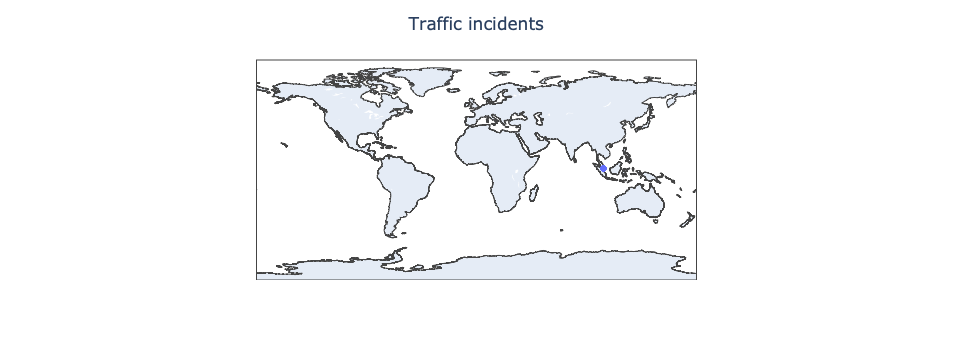

In [12]:
import plotly.express as px

fig = px.scatter_geo(df2,lat='Latitude',lon='Longitude', hover_name="Message")
fig.update_layout(title = 'Traffic incidents', title_x=0.5)
fig.show()

### Alternative method: Using shape files

In [ ]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

Singapore shape file is obtained from here:

https://data.gov.sg/dataset/master-plan-2014-land-use?resource_id=0d1a6cda-7cad-4b17-b9a8-9e173afebbc1

In [ ]:
# Reading in Singapore shape file 
street_map= gpd.read_file('/content/G_MP14_LAND_USE_PL.shp')

The Coordinate Reference Systems (CRS) is set to EPSG: 4326 for WGS 84, a commonly used geodatic system [1, 2]:

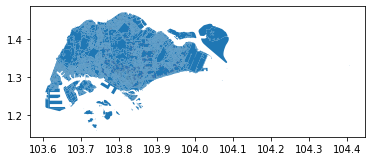

In [ ]:
# Plotting the Singapore map using CRS set to ESPG: 4326
# The axis of the plot displays latitudes and longitudes

street_map.to_crs(epsg=4326).plot()

**For traffic incidents**

In [ ]:
# Same CRS will be used for the coordinates in df3
crs={'init': 'epsg:4236'}
# Dataframe for traffic incidents
df2.head()

Type  Latitude   Longitude  \
0      Heavy Traffic  1.343899  103.860498   
1           Roadwork  1.306279  103.801891   
2           Roadwork  1.304849  103.883480   
3           Roadwork  1.326819  103.696520   
4  Vehicle breakdown  1.329545  103.864556   

                                             Message  
0  (9/7)13:10 Heavy Traffic on CTE (towards AYE) ...  
1  (9/7)12:56 Roadworks on Queensway (towards Lor...  
2  (9/7)12:55 Roadworks on Mountbatten Road (towa...  
3  (9/7)12:52 Roadworks on Pioneer Road North (to...  
4  (9/7)12:42 Vehicle breakdown on PIE (towards C...

In [ ]:
# Creating Points for all latitudes and longitudes in df3
# The longitudes will come before the latitudes when doing so
geometry= [Point(xy) for xy in zip (df2['Longitude'], df2['Latitude'])]

# Checking point creation is successful
geometry[:3]

In [ ]:
# Creating a geo dataframe with all the points obtained aboved
geo_df= gpd.GeoDataFrame(df2, crs=crs, geometry=geometry)

# Display
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Type  Latitude   Longitude  \
0      Heavy Traffic  1.343899  103.860498   
1           Roadwork  1.306279  103.801891   
2           Roadwork  1.304849  103.883480   
3           Roadwork  1.326819  103.696520   
4  Vehicle breakdown  1.329545  103.864556   

                                             Message  \
0  (9/7)13:10 Heavy Traffic on CTE (towards AYE) ...   
1  (9/7)12:56 Roadworks on Queensway (towards Lor...   
2  (9/7)12:55 Roadworks on Mountbatten Road (towa...   
3  (9/7)12:52 Roadworks on Pioneer Road North (to...   
4  (9/7)12:42 Vehicle breakdown on PIE (towards C...   

                    geometry  
0  POINT (103.86050 1.34390)  
1  POINT (103.80189 1.30628)  
2  POINT (103.88348 1.30485)  
3  POINT (103.69652 1.32682)  
4  POINT (103.86456 1.32954)

Text(0.5, 1.0, 'Singapore Traffic Map')

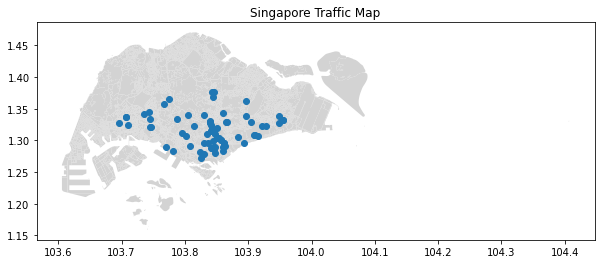

In [ ]:
# Plotting the traffic incident points onto Singapore map
fig, ax = plt.subplots(figsize = (10,10))
# Changing the Singapore map to light grey for better visual effect
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
# Plotting in the points
geo_df.plot(ax=ax)
# Set title
ax.set_title('Singapore Traffic Map')
# However hover/pop up messages cannot be added in



---



**For speed bands**

In [ ]:
# Dataframe for speed bands is df4
# To re-cap:
df4.head(2)

LinkID      RoadName RoadCategory  SpeedBand MinimumSpeed MaximumSpeed  \
0  103000000     KENT ROAD            E          3           20           29   
1  103000010  BUCKLEY ROAD            E          3           20           29   

            Start_lat           Start_lon             End_lat  \
0  1.3170142376560023  103.85298052044503  1.3166840028663076   
1  1.3166507852203482  103.84102305136321   1.316912438354752   

              End_lon  
0  103.85259882242372  
1  103.84022564204443

In [ ]:
# Checking data types of the variables 
df4.dtypes

LinkID          object
RoadName        object
RoadCategory    object
SpeedBand        int64
MinimumSpeed    object
MaximumSpeed    object
Start_lat       object
Start_lon       object
End_lat         object
End_lon         object
dtype: object

In [ ]:
# As noted above, Start_lat, Start_lon, End_lat, End_lon are all objects
# and cannot be used to create points.
# Converting all the latitudes and longitudes in df4 into float
df4[["Start_lat", "Start_lon", "End_lat", "End_lon"]] = df4[["Start_lat", "Start_lon", "End_lat", "End_lon"]].apply(pd.to_numeric)

In [ ]:
# Converting the starting latitudes and longitudes into points
# Longitudes will go before latitudes
geometry= [Point(xy) for xy in zip (df4['Start_lon'], df4['Start_lat'])]

# Checking
geometry[:3]

In [ ]:
# Continue to use EPSG: 4236 for CRS
crs={'init': 'epsg:4236'}
# Creating a geo dataframe for speed bands using points obtained above
geo_df= gpd.GeoDataFrame(df4, crs=crs, geometry=geometry)

# Check
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


LinkID         RoadName RoadCategory  SpeedBand MinimumSpeed  \
0  103000000        KENT ROAD            E          3           20   
1  103000010     BUCKLEY ROAD            E          3           20   
2  103000011     BUCKLEY ROAD            E          2           10   
3  103000014  SHREWSBURY ROAD            E          3           20   
4  103000015  SHREWSBURY ROAD            E          5           40   

  MaximumSpeed  Start_lat   Start_lon   End_lat     End_lon  \
0           29   1.317014  103.852981  1.316684  103.852599   
1           29   1.316651  103.841023  1.316912  103.840226   
2           19   1.316912  103.840226  1.316651  103.841023   
3           29   1.318673  103.847003  1.318021  103.847114   
4           49   1.318021  103.847114  1.318673  103.847003   

                    geometry  
0  POINT (103.85298 1.31701)  
1  POINT (103.84102 1.31665)  
2  POINT (103.84023 1.31691)  
3  POINT (103.84700 1.31867)  
4  POINT (103.84711 1.31802)

In [ ]:
# According to LTA's documentation, there will be various speed bands
# Checking the speed band values in the dataset
df4['SpeedBand'].value_counts()

3    152
4    145
5     75
2     62
8     35
6     20
7      7
1      4
Name: SpeedBand, dtype: int64

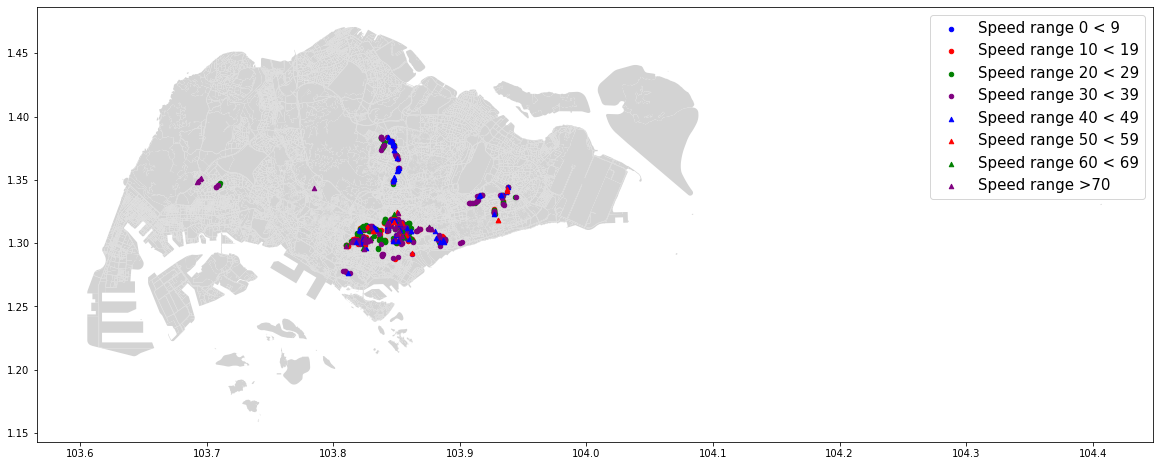

In [ ]:
# Plotting the various speed bands on Singapore map
fig,ax=plt.subplots(figsize=(20,20))
# Singapore map set to light grey for better contrast
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
# The different speed bands in various colours and shapes and respective legend
geo_df[geo_df['SpeedBand']==1].plot(ax=ax, markersize=20, color='blue', marker='o', label="Speed range 0 < 9")
geo_df[geo_df['SpeedBand']==2].plot(ax=ax, markersize=20, color='red', marker='o', label="Speed range 10 < 19")
geo_df[geo_df['SpeedBand']==3].plot(ax=ax, markersize=20, color='green', marker='o', label="Speed range 20 < 29")
geo_df[geo_df['SpeedBand']==4].plot(ax=ax, markersize=20, color='purple', marker='o', label="Speed range 30 < 39")
geo_df[geo_df['SpeedBand']==5].plot(ax=ax, markersize=20, color='blue', marker='^', label="Speed range 40 < 49")
geo_df[geo_df['SpeedBand']==6].plot(ax=ax, markersize=20, color='red', marker='^', label="Speed range 50 < 59")
geo_df[geo_df['SpeedBand']==7].plot(ax=ax, markersize=20, color='green', marker='^', label="Speed range 60 < 69")
geo_df[geo_df['SpeedBand']==8].plot(ax=ax, markersize=20, color='purple', marker='^', label="Speed range >70")
plt.legend(prop={'size':15})

Limitation: The points are clustered together and the points for different speed cannot be distinguished very clearly. Attempts had been made to enlarge the figsize, but there isn't significant improvement. As such the ending points of the speed bands were not plotted to avoid more cluttering.

# Update: Problem resolution

The Folium maps not displaying could be due to system compatibility issues. Running the notebook again using Google Colaboratory displayed the output successfully:

**Traffic incidents**

In [16]:
# For traffic incidents
for i in range(0,len(df2)):
    folium.Marker(
      location=[df2.iloc[i]['Latitude'], df2.iloc[i]['Longitude']],
      popup=df2.iloc[i]['Message'],
      ).add_to(sing_map)

# Display
sing_map

In [ ]:
sing_map.save("incidentsOutput.html")



---



**Speed bands**

In [21]:
import folium.plugins
import branca
import branca.colormap as cm

colormap = cm.LinearColormap(colors=['purple', 'blue', 'cyan', 'yellow', 'orange', 'red', 'green', 'pink'],
                             index=[1, 2, 3, 4, 5, 6, 7, 8], vmin=1, vmax=8)
                            
lat = list(df4.Start_lat)
lon = list(df4.Start_lon)
speed_bands = list(df4.SpeedBand)

for loc, p in zip(zip(lat, lon),speed_bands):
      folium.Circle(
      location=loc,
      fill=True, 
      radius=200,
      color=colormap(p)).add_to(sing_map)

# Display
sing_map

# References

[1] Managing projections — GeoPandas 0.11.0+0.G1977b50.Dirty documentation (no date) Geopandas.org. Available at: https://geopandas.org/en/stable/docs/user_guide/projections.html (Accessed: July 9, 2022).

[2] EPSG:4326 (no date) Epsg.io. Available at: https://epsg.io/4326 (Accessed: July 9, 2022).

***